<a href="https://colab.research.google.com/github/WeCanLearnMachineLearning/Gabby_/blob/main/Livelihood_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

def clean_dataset(dataset_path):
    # Load the CSV dataset into a pandas DataFrame
    df = pd.read_csv(dataset_path)

    # Clean up the dataset by removing leading and trailing spaces
    cleaned_df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Impute missing values with the mean using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    cleaned_df = pd.DataFrame(imputer.fit_transform(cleaned_df), columns=cleaned_df.columns)

    return cleaned_df

# Example usage
dataset_name = "Uganda 5.csv"
cleaned_dataset = clean_dataset(dataset_name)
print(cleaned_dataset.head())

     1     2     3    4    5    6    7    8    9   10  ...   74   75   76  \
0  1.0  25.0   8.0  2.0  3.0  1.0  2.0  3.0  2.0  3.0  ...  2.0  1.0  2.0   
1  1.0  20.0   2.0  1.0  3.0  3.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  2.0   
2  1.0  28.0   2.0  2.0  4.0  1.0  2.0  1.0  0.0  1.0  ...  2.0  1.0  2.0   
3  1.0  63.0  32.0  2.0  1.0  3.0  6.0  8.0  2.0  4.0  ...  2.0  1.0  2.0   
4  1.0  30.0  20.0  2.0  3.0  1.0  8.0  2.0  3.0  5.0  ...  0.0  0.0  0.0   

    77   78   79   80   82   94  116  
0  2.0  0.0  0.0  0.0  0.0  0.0  1.0  
1  2.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  0.0  0.0  3.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 35 columns]


## Importing the dataset

In [ ]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 1. 38.  1. ...  0.  3.  0.]
 [ 2. 31. 25. ...  3.  3.  0.]
 [ 1. 37. 20. ...  1.  0.  0.]
 ...
 [ 2. 27. 20. ...  0.  3.  0.]
 [ 2. 28. 10. ...  0.  0.  0.]
 [ 1. 56. 40. ...  2.  1.  0.]]


In [ ]:
print(y_train)

[0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


In [ ]:
print(X_test)

[[ 2. 32.  8. ...  0.  0.  0.]
 [ 2. 33.  0. ...  0.  0.  0.]
 [ 1. 30. 15. ...  2.  1.  0.]
 ...
 [ 1. 66. 12. ...  0.  0.  0.]
 [ 2. 60. 40. ...  0.  0.  0.]
 [ 1. 56. 23. ...  2.  0.  0.]]


In [ ]:
print(y_test)

[1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.65173579 -0.22143455 -1.15834413 ... -0.6912822   2.0938953
  -0.47321673]
 [ 1.32108606 -0.75891037  1.02054252 ...  1.97849733  2.0938953
  -0.47321673]
 [-0.65173579 -0.29821681  0.5666078  ...  0.19864431 -0.66511968
  -0.47321673]
 ...
 [ 1.32108606 -1.0660394   0.5666078  ... -0.6912822   2.0938953
  -0.47321673]
 [ 1.32108606 -0.98925714 -0.34126164 ... -0.6912822  -0.66511968
  -0.47321673]
 [-0.65173579  1.16064612  2.38234667 ...  1.08857082  0.25455198
  -0.47321673]]


In [ ]:
print(X_test)

[[ 1.32108606 -0.68212811 -0.52283552 ... -0.6912822  -0.66511968
  -0.47321673]
 [ 1.32108606 -0.60534585 -1.24913107 ... -0.6912822  -0.66511968
  -0.47321673]
 [-0.65173579 -0.83569263  0.11267308 ...  1.08857082  0.25455198
  -0.47321673]
 ...
 [-0.65173579  1.92846871 -0.15968775 ... -0.6912822  -0.66511968
  -0.47321673]
 [ 1.32108606  1.46777515  2.38234667 ... -0.6912822  -0.66511968
  -0.47321673]
 [-0.65173579  1.16064612  0.83896863 ...  1.08857082 -0.66511968
  -0.47321673]]


## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  5]
 [ 2 18]]


0.8157894736842105

## Visualising the Training set results

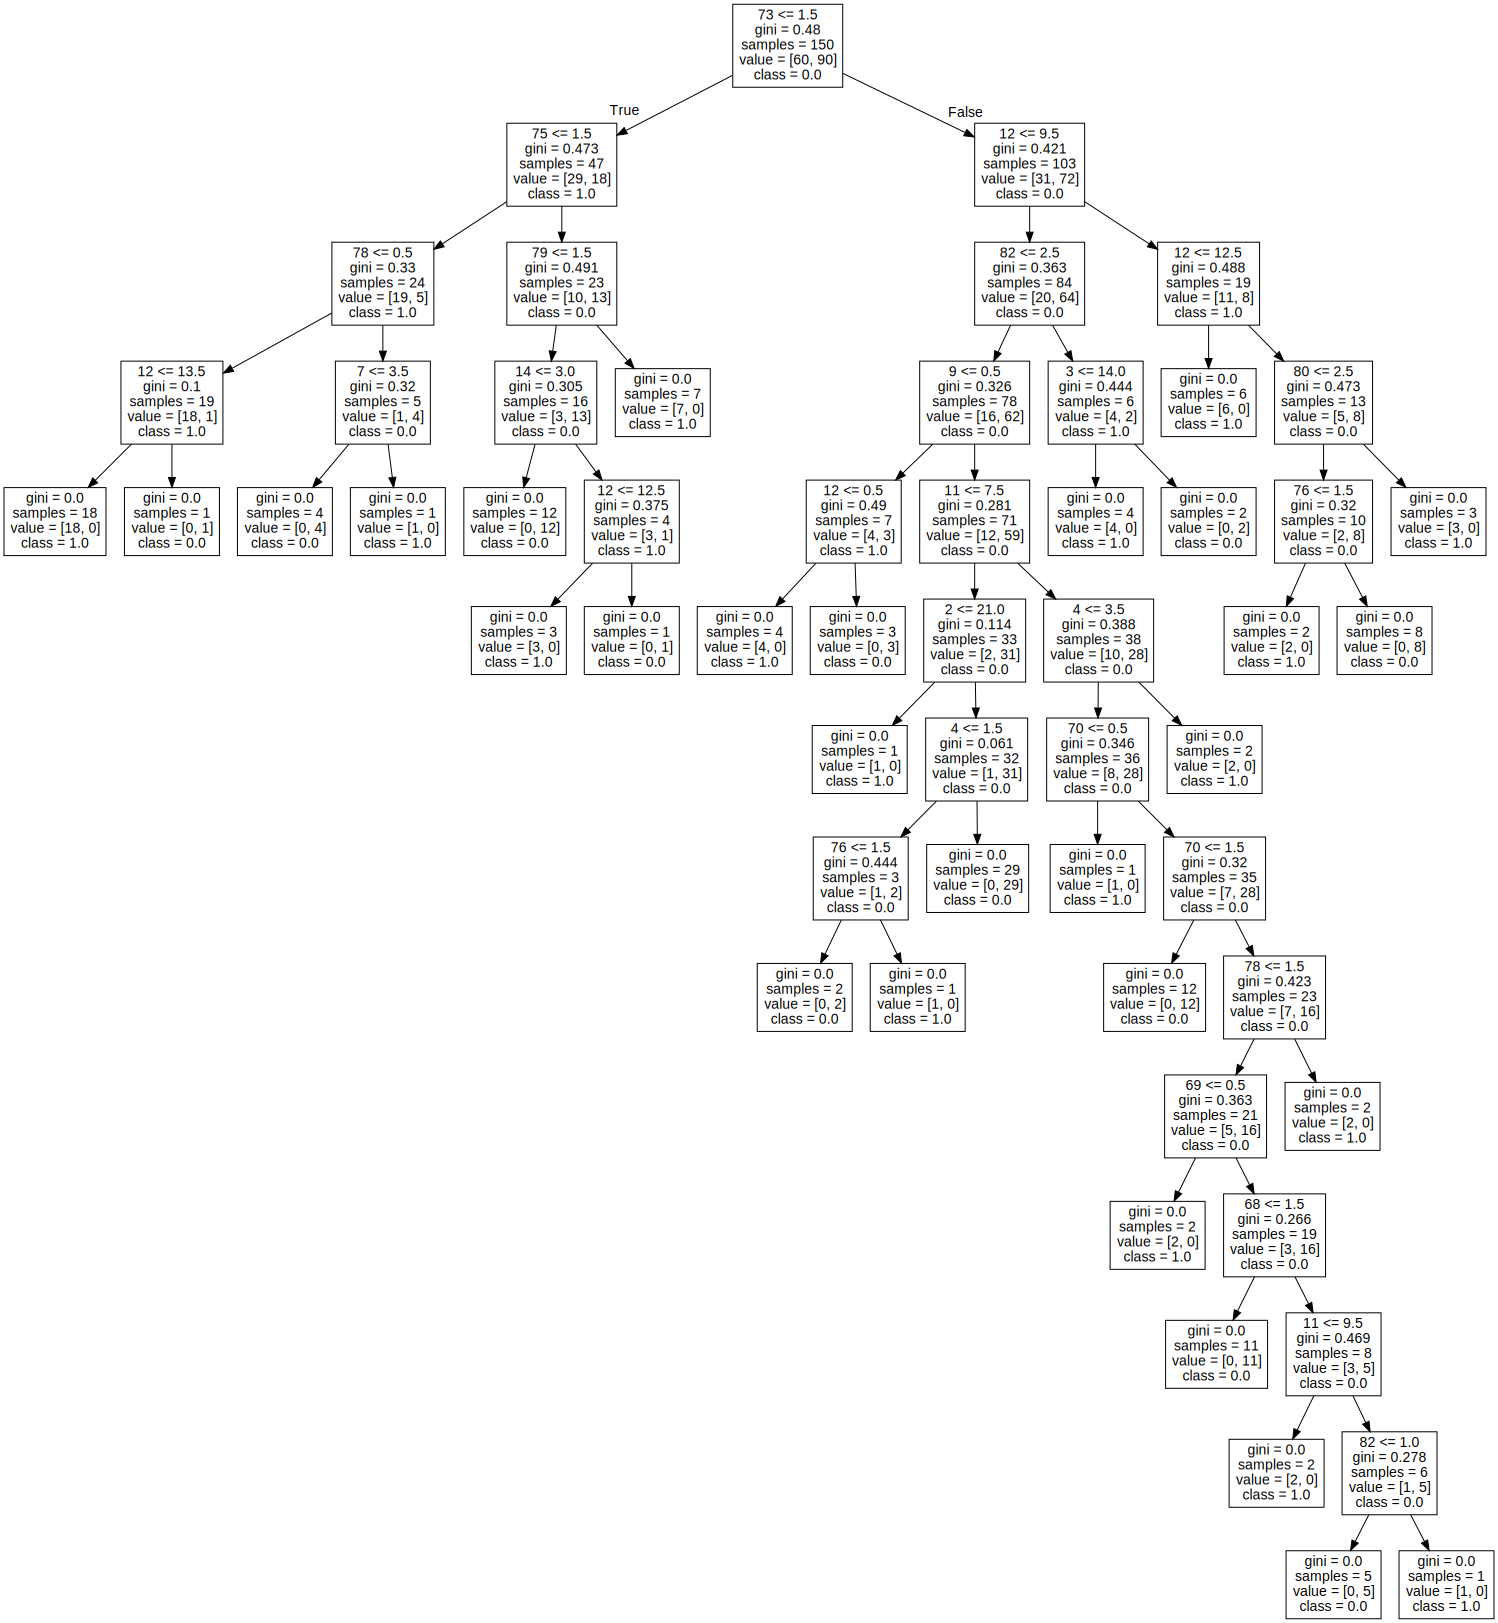

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Assuming you have split your dataset into features (X) and target (y)
X = cleaned_dataset.drop('116', axis=1)
y = cleaned_dataset['116'].astype(str)

# Create and fit the decision tree classifier model
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Generate the visualization
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=y.unique())
graph = graphviz.Source(dot_data)

# Display the visualization
display(graph)



Let's break it down:

"73 <= 1.5": This is a splitting criterion for a particular node in the decision tree. It indicates that if the feature value at this node is less than or equal to 1.5, the tree follows the left branch (True), otherwise it follows the right branch (False).

"gini = 0.48": The Gini index is a measure of impurity in a node. A value of 0 indicates pure (homogeneous) classes, while a value closer to 1 indicates a higher degree of impurity. In this case, the Gini index for this node is 0.48, suggesting a moderate level of impurity.

"samples = 150": This indicates the number of samples (data points) present in the node. In this case, there are 150 samples.

"value = [60, 90]": This shows the distribution of class labels in the node. The first value (60) corresponds to the count of samples labeled as class 0, and the second value (90) corresponds to the count of samples labeled as class 1.

"class = 0.0": This indicates the predicted class for this node. In this case, the majority class in the node is class 0, so the predicted class for this node is 0.0.

"True": This indicates that if the previous condition (73 <= 1.5) is satisfied (True), the tree follows the left branch.

"75 <= 1.5": This is another splitting criterion for the left branch of the previous node. It indicates that if the feature value at this node is less than or equal to 1.5, the tree follows the left branch, otherwise it follows the right branch.

"gini = 0.473": This is the Gini index for this node, indicating a slightly lower level of impurity compared to the previous node.

"samples = 47": This node has 47 samples.

"value = [29, 18]": This node has 29 samples labeled as class 0 and 18 samples labeled as class 1.

"class = 1.0": The predicted class for this node is 1.0, as it has a higher count of samples labeled as class 1.

"False": This indicates that if the previous condition (75 <= 1.5) is not satisfied (False), the tree follows the right branch.

These are some of the key aspects of the decision tree structure and splitting criteria. The decision tree continues to grow and split based on different conditions until it reaches the leaf nodes, where the final predictions are made.

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# Generate the visualization
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["Class 0", "Class 1"],
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree_colormap")

'decision_tree_colormap.png'

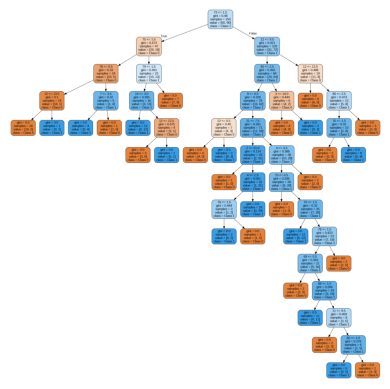

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Open and display the image
image = Image.open("decision_tree_colormap.png")
plt.imshow(image)
plt.axis('off')
plt.show()

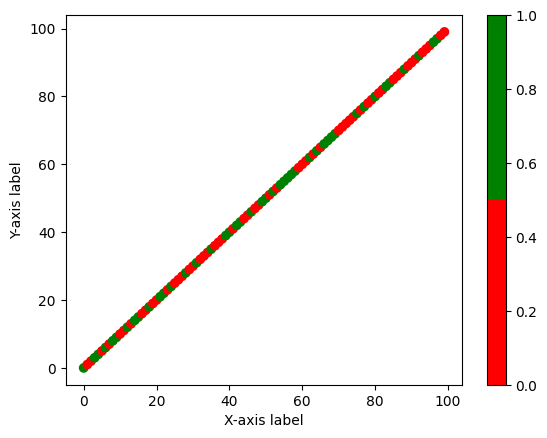

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Define your colormap colors
colors = ['red', 'green']

# Create the ListedColormap
cmap = ListedColormap(colors)

# Create a random array of values (0 and 1)
values = np.random.randint(0, 2, size=(100,))

# Plot the values using the colormap
plt.scatter(range(len(values)), range(len(values)), c=values, cmap=cmap)

# Add axes titles
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the colorbar
plt.colorbar()

# Display the plot
plt.show()


feature importance

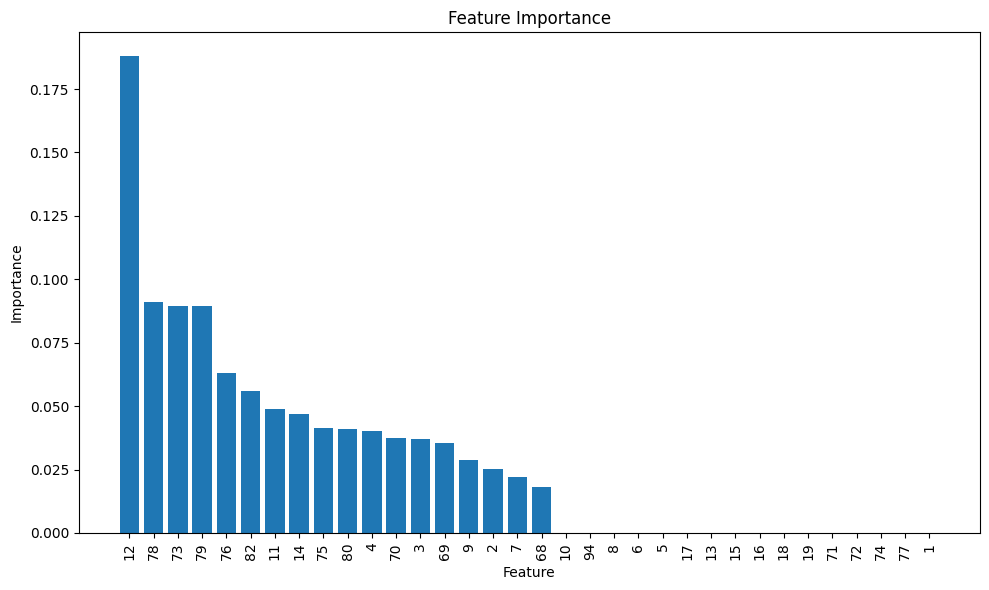

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the feature importances from the decision tree classifier
importances = clf.feature_importances_

# Get the names of the features
feature_names = cleaned_dataset.columns[:-1]  

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
